In [4]:
!pip install --upgrade openpyxl


In [1]:
import pandas as pd

# Path to your Excel file
file_path = "/Users/xipuwang/Downloads/emory2025spring/QTM 550/LP-Project Plan/9pct_lihtc_2023/all_in_one_sheets2023.xlsx"

# Read all sheets by specifying sheet_name=None
all_sheets = pd.read_excel(file_path, sheet_name=None)

for sheet_name, df in all_sheets.items():
    print(f"Sheet Name: {sheet_name}")
    print(df.head())

Sheet Name: 2023-053hsrvrdl2core
Empty DataFrame
Columns: []
Index: []
Sheet Name: 2023-037hillsidecore
                                                  0    1    2    3    4    5   \
0  PART EIGHT - SCORING CRITERIA  -  2023-0 Hills...  NaN  NaN  NaN  NaN  NaN   
1                                                NaN  NaN  NaN  NaN  NaN  NaN   
2  NOTE: This Application does not list all requi...  NaN  NaN  NaN  NaN  NaN   
3                                                NaN  NaN  NaN  NaN  NaN  NaN   
4                                                NaN  NaN  NaN  NaN  NaN  NaN   

    6    7    8    9   ...   54   55   56   57   58   59   60   61   62   63  
0  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4  NaN  NaN  N

In [8]:
print(df)

                                                    0    1    2    3    4   \
0    PART EIGHT - SCORING CRITERIA  -  2023-0 Bloun...  NaN  NaN  NaN  NaN   
1                                                  NaN  NaN  NaN  NaN  NaN   
2    NOTE: This Application does not list all requi...  NaN  NaN  NaN  NaN   
3                                                  NaN  NaN  NaN  NaN  NaN   
4                                                  NaN  NaN  NaN  NaN  NaN   
..                                                 ...  ...  ...  ...  ...   
473                                                NaN  NaN  NaN  NaN  NaN   
474                                                NaN  NaN  NaN  NaN  NaN   
475                                                NaN  NaN  NaN  NaN  NaN   
476                                                NaN  NaN  NaN  NaN  NaN   
477                                                NaN  NaN  NaN  NaN  NaN   

      5              6              7             8    9   ... 

In [ ]:
import pandas as pd

file_path = "/Users/xipuwang/Downloads/emory2025spring/QTM 550/LP-Project Plan/9pct_lihtc_2023/all_in_one_sheets2023.xlsx"
all_sheets = pd.read_excel(file_path, sheet_name=None, header=None)

for sheet_name, df in all_sheets.items():
    # 1) Drop empty columns/rows:
    df = df.dropna(axis='columns', how='all').dropna(axis='rows', how='all')
    
    if df.empty:
        print(f"{sheet_name}: Empty or no data after cleaning.")
        continue
    
    search_str = "SCORE"  
    # find rows containing that string in any column:
    row_indices = df[df.apply(lambda row: row.astype(str).str.contains(search_str, case=False).any(), axis=1)].index
    
    if len(row_indices) > 0:
        start_row = row_indices[0]
        # parse from that row down
        scoring_data = df.iloc[start_row:, :]
        # rename columns if needed, or if the row right below
        # is your header, you might do scoring_data = scoring_data[1:]
        
        print(f"{sheet_name}: Found possible scoring data from row {start_row}")
        # do something with `scoring_data`
    else:
        print(f"{sheet_name}: No obvious 'SCORE' row found.")


2023-053hsrvrdl2core: Empty or no data after cleaning.
2023-037hillsidecore: Found possible scoring data from row 4
2023-021villascambornecore: Found possible scoring data from row 4
2023-063houstonlkcore: Found possible scoring data from row 4
2023-019csstcrsngcore: Found possible scoring data from row 4
2023-033heritagecoreappusdapres: Found possible scoring data from row 4
2023-012_1700draytonstcore: Found possible scoring data from row 4
2023-061tanyrdbrch1core: Found possible scoring data from row 4
2023-011hilmntcore: Found possible scoring data from row 4
2023-025valleytrailcore: Found possible scoring data from row 4
2023-042gatewaylndgcore: Found possible scoring data from row 4
2023-047magnoliaplccore: Found possible scoring data from row 4
2023-020oaksidecore: Found possible scoring data from row 4
2023-074harveststn2: Found possible scoring data from row 4
2023-016hdcklndgcore: Found possible scoring data from row 4
2023-002vlglgcyp2core: Found possible scoring data from ro

In [ ]:
import pandas as pd
import numpy as np
import re

def extract_scoring_info(excel_path, output_excel="extracted_self_scores.xlsx"):
  
    all_sheets = pd.read_excel(excel_path, sheet_name=None, header=None)
    
    # A list to hold the final extracted rows
    extracted_data = []

    for sheet_name, df in all_sheets.items():
      
        df = df.dropna(how='all', axis='rows').dropna(how='all', axis='columns')
        if df.empty:
            # nothing to parse
            continue
  
        scoring_rows = df[df.apply(
            lambda row: row.astype(str).str.contains("score", case=False).any(),
            axis=1
        )]
        

        part_eight_idx = df[df.apply(
            lambda row: row.astype(str).str.contains("PART EIGHT", case=False).any(),
            axis=1
        )].index
        
        start_idx = part_eight_idx[0] if not part_eight_idx.empty else 0
        
        # For simplicity, let’s just work with df from `start_idx` onward
        df_section = df.iloc[start_idx:].copy()
        
        # Clean up again after slicing
        df_section = df_section.dropna(how='all', axis='rows').dropna(how='all', axis='columns')
        
        # Inspect the shape
        if df_section.empty:
            
            continue
        
       
        
        # Convert to list-of-lists for manual scanning:
        raw_data = df_section.values.tolist()

        
        for row in raw_data:
            row_strs = [str(x).strip() for x in row]
       
            
            score_pattern = re.compile(r"self\s*score\s*[:\-]?\s*(\d+)", re.IGNORECASE)
            
            # We'll store found elements in variables
            category = None
            subcategory = None
            subcategory_score = None
            description = None
            self_score = None
            
            for cell in row_strs:
          
                score_match = score_pattern.search(cell)
                if score_match:
                    self_score = score_match.group(1)  # The numeric value
               
            if self_score:
     
                # This is definitely a guess. Please refine as needed.
                possible_category = row_strs[0]
                # ensure it's not just the same text or empty
                if "score" not in possible_category.lower() and possible_category != "nan":
                    category = possible_category
                
        
                description_cells = [
                    c for c in row_strs
                    if c.lower() != possible_category.lower() and not score_pattern.search(c)
                ]
                # Join them with a space, or you can store them as a list
                description = " | ".join(description_cells).replace("nan", "").strip(" |")
                
                extracted_data.append({
                    "SheetName": sheet_name,
                    "Project": sheet_name,  
                    "Category": category,
                    "Subcategory": subcategory,
                    "SelfScore": self_score,
                    "SubcategoryScore": subcategory_score,
                    "Description": description
                })
    
  
    results_df = pd.DataFrame(extracted_data)
    

    columns_order = ["SheetName", "Project", "Category", "SelfScore", "Subcategory", "SubcategoryScore", "Description"]
    results_df = results_df.reindex(columns=columns_order)

    # Save to Excel
    with pd.ExcelWriter(output_excel) as writer:
        results_df.to_excel(writer, index=False, sheet_name="Extracted Self Scores")
    
    print(f"Done! Results saved to {output_excel} with {len(results_df)} rows.")



if __name__ == "__main__":
    # Provide the path to your actual file
    excel_input = "/Users/xipuwang/Downloads/emory2025spring/QTM 550/LP-Project Plan/9pct_lihtc_2023/all_in_one_sheets2023.xlsx"
    output_path = "/Users/xipuwang/Downloads/extracted_self_scores.xlsx"
    extract_scoring_info(excel_input, output_path)


Done! Results saved to /Users/xipuwang/Downloads/extracted_self_scores.xlsx with 0 rows.


In [ ]:
import pandas as pd

excel_file = "LP-Project Plan/9pct_lihtc_2023/all_in_one_sheets2023.xlsx"
excel_data = pd.ExcelFile(excel_file)

results = {}

for sheet_name in excel_data.sheet_names:
    df = excel_data.parse(sheet_name)

    # If the sheet has fewer than 14 columns (index 13 doesn't exist), skip or create empty DataFrame
    if df.shape[1] < 14:
        results[sheet_name] = pd.DataFrame(columns=["Description", "Number"])
        continue

    # Convert column 14 (Python index 13) to numeric, ignoring errors
    col14_numeric = pd.to_numeric(df.iloc[:, 12], errors='coerce')

    records = []
    for row_idx in df.index:
        # Check if column 14 is a valid numeric value in this row
        if pd.notna(col14_numeric[row_idx]):
            number_val = col14_numeric[row_idx]

            # Gather textual cells from columns 0..13 (except col14 itself at index 13)
            text_parts = []
            for col_idx in range(13):
                cell_value = df.iloc[row_idx, col_idx]
                if isinstance(cell_value, str) and cell_value.strip():
                    text_parts.append(cell_value.strip())

            if text_parts:
                description = " ".join(text_parts)
            else:
               
                description = f"No description, row {row_idx+1}"

            records.append([description, number_val])

    # Create a DataFrame with the two columns: "Description" and "Number"
    result_df = pd.DataFrame(records, columns=["Description", "Number"])

    # Store this DataFrame in the dictionary, keyed by the sheet’s original name
    results[sheet_name] = result_df
    results_2023 = results

for sheet, df_out in results.items():
    print(f"=== Sheet: {sheet} ===")
    print(df_out)
    print()



=== Sheet: 2023-053hsrvrdl2core ===
Empty DataFrame
Columns: [Description, Number]
Index: []

=== Sheet: 2023-037hillsidecore ===
                                          Description  Number
0                       III. APPLICATION COMPLETENESS    10.0
1   IV. DEEPER TARGETING / RENT / INCOME RESTRICTIONS     3.0
2   A. Deeper Targeting through Rent Restrictions ...     2.0
3           Income Averaging Overall Project % of AMI     2.0
4   40% at 60% Minimum Set-asides and Targeting Un...     2.0
..                                                ...     ...
76                                    B. Property Age     4.0
77         XXIX. USDA “PORTFOLIO” ADDITIONAL CRITERIA    16.0
78                         A. Geographic Distribution    10.0
79                        B. Severe and Critical Need     6.0
80                               TOTAL POSSIBLE SCORE    61.0

[81 rows x 2 columns]

=== Sheet: 2023-021villascambornecore ===
                                          Description  Numbe

In [8]:
import pandas as pd

excel_file = "LP-Project Plan/9pct_lihtc_2022/all_in_one_sheets2022.xlsx"
excel_data = pd.ExcelFile(excel_file)

results = {}

for sheet_name in excel_data.sheet_names:
    df = excel_data.parse(sheet_name)

    # If the sheet has fewer than 14 columns (index 13 doesn't exist), skip or create empty DataFrame
    if df.shape[1] < 14:
        results[sheet_name] = pd.DataFrame(columns=["Description", "Number"])
        continue

    # Convert column 14 (Python index 13) to numeric, ignoring errors
    col14_numeric = pd.to_numeric(df.iloc[:, 14], errors='coerce')

    records = []
    for row_idx in df.index:
        # Check if column 14 is a valid numeric value in this row
        if pd.notna(col14_numeric[row_idx]):
            number_val = col14_numeric[row_idx]

            # Gather textual cells from columns 0..13 (except col14 itself at index 13)
            text_parts = []
            for col_idx in range(13):
                cell_value = df.iloc[row_idx, col_idx]
                if isinstance(cell_value, str) and cell_value.strip():
                    text_parts.append(cell_value.strip())

            if text_parts:
                description = " ".join(text_parts)
            else:
                # If there's no text, use the "No description" placeholder
                # row_idx is 0-based; if you want to display 1-based row numbers, do row_idx + 1
                description = f"No description, row {row_idx+1}"

            records.append([description, number_val])

    # Create a DataFrame with the two columns: "Description" and "Number"
    result_df = pd.DataFrame(records, columns=["Description", "Number"])

    # Store this DataFrame in the dictionary, keyed by the sheet’s original name
    results[sheet_name] = result_df
    results_2022 = results
# Example: Print each sheet's results
for sheet, df_out in results.items():
    print(f"=== Sheet: {sheet} ===")
    print(df_out)
    print()



=== Sheet: 2022-027theoasiscore ===
                                          Description  Number
0                May 12 2022 Core Application TOTALS:    74.5
1   III. APPLICATION COMPLETENESS (Applicants star...    10.0
2                              No description, row 74     0.0
3   IV. DEEPER TARGETING / RENT / INCOME RESTRICTI...     2.0
4                              No description, row 92     2.0
..                                                ...     ...
62      Centerville n/a - Current Current Restaurants     1.0
63  Cochran n/a - Current Current Federally insure...     1.0
64                       Commerce n/a - Alumni Church     1.0
65  COMMUNITY REVITALIZATION PLANS Conyers n/a - C...     1.0
66  <Select a Community Revitalization Plan option...     1.0

[67 rows x 2 columns]

=== Sheet: 2022-012cvinverncore ===
                                          Description  Number
0                May 12 2022 Core Application TOTALS:    73.0
1   III. APPLICATION COMPLETENESS (A

In [ ]:
import pandas as pd

excel_file = "LP-Project Plan/9pct_lihtc_2021/all_in_one_sheets2021.xlsx"
excel_data = pd.ExcelFile(excel_file)

results = {}

for sheet_name in excel_data.sheet_names:
    df = excel_data.parse(sheet_name)

    # If the sheet has fewer than 14 columns (index 13 doesn't exist), skip or create empty DataFrame
    if df.shape[1] < 14:
        results[sheet_name] = pd.DataFrame(columns=["Description", "Number"])
        continue

    # Convert column 14 (Python index 13) to numeric, ignoring errors
    col14_numeric = pd.to_numeric(df.iloc[:, 14], errors='coerce')

    records = []
    for row_idx in df.index:
        # Check if column 14 is a valid numeric value in this row
        if pd.notna(col14_numeric[row_idx]):
            number_val = col14_numeric[row_idx]

            # Gather textual cells from columns 0..13 (except col14 itself at index 13)
            text_parts = []
            for col_idx in range(13):
                cell_value = df.iloc[row_idx, col_idx]
                if isinstance(cell_value, str) and cell_value.strip():
                    text_parts.append(cell_value.strip())

            if text_parts:
                description = " ".join(text_parts)
            else:
               
                description = f"No description, row {row_idx+1}"

            records.append([description, number_val])

    # Create a DataFrame with the two columns: "Description" and "Number"
    result_df = pd.DataFrame(records, columns=["Description", "Number"])

    # Store this DataFrame in the dictionary, keyed by the sheet’s original name
    results[sheet_name] = result_df
    results_2021 = results
# Example: Print each sheet's results
for sheet, df_out in results.items():
    print(f"=== Sheet: {sheet} ===")
    print(df_out)
    print()



=== Sheet: 2021-050sparrowptegoracore ===
                                          Description  Number
0                       2021 Core Application TOTALS:    61.0
1   III. APPLICATION COMPLETENESS (Applicants star...    10.0
2                              No description, row 70     0.0
3   IV. DEEPER TARGETING / RENT / INCOME RESTRICTI...     2.0
4                              No description, row 88     2.0
5        1. Income Averaging Overall Project % of AMI     2.0
6   B. Deeper Targeting through New PBRA Contracts...     0.0
7   V. DESIRABLE AND UNDESIRABLE ACTIVITIES Activi...    20.0
8   A. Desirable Activities (1 or 2 pts each - see...    20.0
9   VI. COMMUNITY TRANSPORTATION OPTIONS See QAP f...     3.0
10  If multiple entrances and/or stops: Proposed T...     0.1
11  A. Transit-Oriented Development Choose either ...     0.0
12  B. Access to Public Transportation Choose only...     3.0
13  1. Site is within a 0.25 mile* walking distanc...     3.0
14         VII. QUALITY EDUC

In [ ]:
import pandas as pd

excel_file = "LP-Project Plan/9pct_lihtc_2020/all_in_one_sheets2020.xlsx"
excel_data = pd.ExcelFile(excel_file)

results = {}

for sheet_name in excel_data.sheet_names:
    df = excel_data.parse(sheet_name)

    # If the sheet has fewer than 14 columns (index 13 doesn't exist), skip or create empty DataFrame
    if df.shape[1] < 14:
        results[sheet_name] = pd.DataFrame(columns=["Description", "Number"])
        continue

    # Convert column 14 (Python index 13) to numeric, ignoring errors
    col14_numeric = pd.to_numeric(df.iloc[:, 14], errors='coerce')

    records = []
    for row_idx in df.index:
        # Check if column 14 is a valid numeric value in this row
        if pd.notna(col14_numeric[row_idx]):
            number_val = col14_numeric[row_idx]

            # Gather textual cells from columns 0..13 (except col14 itself at index 13)
            text_parts = []
            for col_idx in range(13):
                cell_value = df.iloc[row_idx, col_idx]
                if isinstance(cell_value, str) and cell_value.strip():
                    text_parts.append(cell_value.strip())

            if text_parts:
                description = " ".join(text_parts)
            else:
                
                description = f"No description, row {row_idx+1}"

            records.append([description, number_val])

    # Create a DataFrame with the two columns: "Description" and "Number"
    result_df = pd.DataFrame(records, columns=["Description", "Number"])

    # Store this DataFrame in the dictionary, keyed by the sheet’s original name
    results[sheet_name] = result_df
    results_2020 = results

for sheet, df_out in results.items():
    print(f"=== Sheet: {sheet} ===")
    print(df_out)
    print()



=== Sheet: 2020-062hrthsidejonesborogora ===
                                          Description  Number
0                        May 19, 2020 Version TOTALS:    56.0
1   I. APPLICATION COMPLETENESS (Applicants start ...    10.0
2                              No description, row 36     0.0
3   II. DEEPER TARGETING / RENT / INCOME RESTRICTI...     2.0
4                              No description, row 54     2.0
..                                                ...     ...
72      Centerville n/a - Current Current Restaurants     1.0
73  Cochran n/a - Current Current Federally insure...     1.0
74                       Commerce n/a - Alumni Church     1.0
75  COMMUNITY REVITALIZATION PLANS Conyers n/a - C...     1.0
76  <Select a Community Revitalization Plan option...     1.0

[77 rows x 2 columns]

=== Sheet: 2020-054evanscommonsgora ===
                                          Description  Number
0                        May 26, 2020 Version TOTALS:    55.0
1   MISSING / INADEQUAT

In [ ]:
import pandas as pd

excel_file = "LP-Project Plan/9pct_lihtc_2019/all_in_one_sheets2019.xlsx"
excel_data = pd.ExcelFile(excel_file)

results = {}

for sheet_name in excel_data.sheet_names:
    df = excel_data.parse(sheet_name)

    # If the sheet has fewer than 14 columns (index 13 doesn't exist), skip or create empty DataFrame
    if df.shape[1] < 14:
        results[sheet_name] = pd.DataFrame(columns=["Description", "Number"])
        continue

    # Convert column 14 (Python index 13) to numeric, ignoring errors
    col14_numeric = pd.to_numeric(df.iloc[:, 14], errors='coerce')

    records = []
    for row_idx in df.index:
        # Check if column 14 is a valid numeric value in this row
        if pd.notna(col14_numeric[row_idx]):
            number_val = col14_numeric[row_idx]

            # Gather textual cells from columns 0..13 (except col14 itself at index 13)
            text_parts = []
            for col_idx in range(13):
                cell_value = df.iloc[row_idx, col_idx]
                if isinstance(cell_value, str) and cell_value.strip():
                    text_parts.append(cell_value.strip())

            if text_parts:
                description = " ".join(text_parts)
            else:
              
                description = f"No description, row {row_idx+1}"

            records.append([description, number_val])

    # Create a DataFrame with the two columns: "Description" and "Number"
    result_df = pd.DataFrame(records, columns=["Description", "Number"])

    # Store this DataFrame in the dictionary, keyed by the sheet’s original name
    results[sheet_name] = result_df
    results_2019 = results

for sheet, df_out in results.items():
    print(f"=== Sheet: {sheet} ===")
    print(df_out)
    print()



=== Sheet: 2019-076kingsbrookgoraapp ===
                                          Description  Number
0                              May 2019 Final TOTALS:    46.0
1   I. APPLICATION COMPLETENESS (Applicants start ...    10.0
2                              No description, row 33     0.0
3   II. DEEPER TARGETING / RENT / INCOME RESTRICTI...     2.0
4                              No description, row 51     2.0
..                                                ...     ...
61                                  Byron Restaurants     1.0
62     Calhoun Federally insured banking institutions     1.0
63                               Camden County Church     1.0
64  COMMUNITY REVITALIZATION PLANS Cartersville Po...     1.0
65  <Select a Community Revitalization Plan option...     1.0

[66 rows x 2 columns]

=== Sheet: 2019-038havenwoodgdnsgoracore ===
                                          Description  Number
0                            April 2019 Final TOTALS:    55.0
1   I. APPLICATION COM

In [ ]:
import pandas as pd

excel_file = "LP-Project Plan/9pct_lihtc_2018/all_in_one_sheets2018.xlsx"
excel_data = pd.ExcelFile(excel_file)

results = {}

for sheet_name in excel_data.sheet_names:
    df = excel_data.parse(sheet_name)

    # If the sheet has fewer than 14 columns (index 13 doesn't exist), skip or create empty DataFrame
    if df.shape[1] < 14:
        results[sheet_name] = pd.DataFrame(columns=["Description", "Number"])
        continue

    # Convert column 14 (Python index 13) to numeric, ignoring errors
    col14_numeric = pd.to_numeric(df.iloc[:, 14], errors='coerce')

    records = []
    for row_idx in df.index:
        # Check if column 14 is a valid numeric value in this row
        if pd.notna(col14_numeric[row_idx]):
            number_val = col14_numeric[row_idx]

            # Gather textual cells from columns 0..13 (except col14 itself at index 13)
            text_parts = []
            for col_idx in range(13):
                cell_value = df.iloc[row_idx, col_idx]
                if isinstance(cell_value, str) and cell_value.strip():
                    text_parts.append(cell_value.strip())

            if text_parts:
                description = " ".join(text_parts)
            else:
               
                description = f"No description, row {row_idx+1}"

            records.append([description, number_val])

    # Create a DataFrame with the two columns: "Description" and "Number"
    result_df = pd.DataFrame(records, columns=["Description", "Number"])

    # Store this DataFrame in the dictionary, keyed by the sheet’s original name
    results[sheet_name] = result_df
    results_2018 = results

for sheet, df_out in results.items():
    print(f"=== Sheet: {sheet} ===")
    print(df_out)
    print()



=== Sheet: 2018-003grovewoodfordgoracore ===
                                          Description  Number
0                                             TOTALS:    55.0
1   I. APPLICATION COMPLETENESS (Applicants start ...    10.0
2   A. Missing or Incomplete Documents For each mi...     0.0
3   Organization One (1) pt deducted if not organi...     0.0
4   B. Financial and Other Adjustments 2-4 adjustm...     0.0
..                                                ...     ...
76                                Calhoun Restaurants     1.0
77  Camden County Federally insured banking instit...     1.0
78                                Cartersville Church     1.0
79  COMMUNITY REVITALIZATION PLANS Cedartown Post ...     1.0
80  <Select a Community Revitalization Plan option...     1.0

[81 rows x 2 columns]

=== Sheet: 2018-023brunswickcmmnsgoracore ===
                                          Description  Number
0                                             TOTALS:    54.0
1   I. APPLICATIO

In [ ]:
import pandas as pd

excel_file = "LP-Project Plan/9pct_lihtc_2016/all_in_one_sheets2016.xlsx"
excel_data = pd.ExcelFile(excel_file)

results = {}

for sheet_name in excel_data.sheet_names:
    df = excel_data.parse(sheet_name)

    # If the sheet has fewer than 14 columns (index 13 doesn't exist), skip or create empty DataFrame
    if df.shape[1] < 14:
        results[sheet_name] = pd.DataFrame(columns=["Description", "Number"])
        continue

    # Convert column 14 (Python index 13) to numeric, ignoring errors
    col14_numeric = pd.to_numeric(df.iloc[:, 14], errors='coerce')

    records = []
    for row_idx in df.index:
        # Check if column 14 is a valid numeric value in this row
        if pd.notna(col14_numeric[row_idx]):
            number_val = col14_numeric[row_idx]

            # Gather textual cells from columns 0..13 (except col14 itself at index 13)
            text_parts = []
            for col_idx in range(13):
                cell_value = df.iloc[row_idx, col_idx]
                if isinstance(cell_value, str) and cell_value.strip():
                    text_parts.append(cell_value.strip())

            if text_parts:
                description = " ".join(text_parts)
            else:

                description = f"No description, row {row_idx+1}"

            records.append([description, number_val])

    # Create a DataFrame with the two columns: "Description" and "Number"
    result_df = pd.DataFrame(records, columns=["Description", "Number"])

    # Store this DataFrame in the dictionary, keyed by the sheet’s original name
    results[sheet_name] = result_df
    results_2016 = results

for sheet, df_out in results.items():
    print(f"=== Sheet: {sheet} ===")
    print(df_out)
    print()



=== Sheet: 2016-019madhtsgoracore ===
                                          Description  Number
0                        May 2016 Revision v6 TOTALS:    60.0
1   1. APPLICATION COMPLETENESS (Applicants start ...    10.0
2   Application Not Organized Correctly Nbr INCOMP...     0.0
3   2. DEEPER TARGETING / RENT / INCOME RESTRICTIO...     2.0
4   Nbr of Restricted Residential Units: Per Appli...     2.0
5                       1. of total residential units     0.0
6                    or 2. of total residential units     2.0
7   B. Deeper Targeting through New PBRA Contracts...     0.0
8   1. (at least) of residential units to have PBR...     0.0
9   3. DESIRABLE AND UNDESIRABLE CHARACTERISTICS S...    13.0
10  A. Desirable Activities (1 or 2 pts each - see...    12.0
11  B. Bonus Desirable Desirable Activity Category...     1.0
12  C. Undesirable Sites (1 pt subtracted each) va...     0.0
13  4. COMMUNITY TRANSPORTATION OPTIONS Choose one...     3.0
14  C. Site is within 1/4 mile* 

In [ ]:
import pandas as pd

excel_file = "LP-Project Plan/9pct_lihtc_2015/all_in_one_sheets2015.xlsx"
excel_data = pd.ExcelFile(excel_file)

results = {}

for sheet_name in excel_data.sheet_names:
    df = excel_data.parse(sheet_name)

    # If the sheet has fewer than 14 columns (index 13 doesn't exist), skip or create empty DataFrame
    if df.shape[1] < 14:
        results[sheet_name] = pd.DataFrame(columns=["Description", "Number"])
        continue

    # Convert column 14 (Python index 13) to numeric, ignoring errors
    col14_numeric = pd.to_numeric(df.iloc[:, 14], errors='coerce')

    records = []
    for row_idx in df.index:
        # Check if column 14 is a valid numeric value in this row
        if pd.notna(col14_numeric[row_idx]):
            number_val = col14_numeric[row_idx]

            # Gather textual cells from columns 0..13 (except col14 itself at index 13)
            text_parts = []
            for col_idx in range(13):
                cell_value = df.iloc[row_idx, col_idx]
                if isinstance(cell_value, str) and cell_value.strip():
                    text_parts.append(cell_value.strip())

            if text_parts:
                description = " ".join(text_parts)
            else:
               
                description = f"No description, row {row_idx+1}"

            records.append([description, number_val])

    # Create a DataFrame with the two columns: "Description" and "Number"
    result_df = pd.DataFrame(records, columns=["Description", "Number"])

    # Store this DataFrame in the dictionary, keyed by the sheet’s original name
    results[sheet_name] = result_df
    results_2015 = results

for sheet, df_out in results.items():
    print(f"=== Sheet: {sheet} ===")
    print(df_out)
    print()


=== Sheet: 2015-007westdalecoregora ===
                                          Description  Number
0                         April 2015 Revision TOTALS:   53.00
1   1. APPLICATION COMPLETENESS (Applicants start ...   10.00
2   A. Missing or Incomplete Documents Number: For...    0.00
3   Organization Number: One (1) pt deducted if no...    0.00
4   B. Financial and Other Adjustments Number: 2-4...    0.00
5   2. DEEPER TARGETING / RENT AND INCOME RESTRICT...    2.00
6   B. Deeper Targeting through new PBRA Contracts...    0.15
7   3. DESIRABLE AND UNDESIRABLE CHARACTERISTICS S...   13.00
8   A. Desirable Activities (1 or 2 pts each - see...   12.00
9   B. Bonus Desirable Desirable Activity Category...    1.00
10  C. Undesirable Sites (1 pt subtracted each) va...    0.00
11  4. COMMUNITY TRANSPORTATION OPTIONS Choose one...    0.00
12  A. Site is owned by the local transit agency a...    0.00
13  B. Site is within one (1) mile* of a transit h...    0.00
14  C. Site is within 1/4 mile

In [ ]:
import pandas as pd

# Loop over the years
for year in range(2003, 2014):
    excel_file = f"LP-Project Plan/9pct_lihtc_{year}/all_in_one_sheets{year}.xlsx"
    excel_data = pd.ExcelFile(excel_file)
    
    # Temporary dictionary for the current year’s sheets
    results_for_this_year = {}
    
    for sheet_name in excel_data.sheet_names:
        df = excel_data.parse(sheet_name)

        # Check if there's enough columns so df.iloc[:,14] is valid (i.e. at least 15 columns total)
        if df.shape[1] < 15:
            empty_df = pd.DataFrame(columns=["Description", "Number"])
            results_for_this_year[sheet_name] = empty_df
            continue

        # Convert column at index 14 to numeric (coercing errors to NaN)
        col14_numeric = pd.to_numeric(df.iloc[:, 14], errors='coerce')

        records = []
        for row_idx in df.index:
            # Only process rows where column 14 is a valid numeric
            if pd.notna(col14_numeric[row_idx]):
                number_val = col14_numeric[row_idx]

                # Gather textual cells from columns 0..13
                text_parts = []
                for col_idx in range(14):  # 0..13
                    cell_value = df.iloc[row_idx, col_idx]
                    if isinstance(cell_value, str) and cell_value.strip():
                        text_parts.append(cell_value.strip())

             
                if text_parts:
                    description = " ".join(text_parts)
                else:
                    description = f"No description, row {row_idx+1}"

                records.append([description, number_val])

        # Create DataFrame for this sheet
        result_df = pd.DataFrame(records, columns=["Description", "Number"])
        # Store it in the dictionary for this year
        results_for_this_year[sheet_name] = result_df

    # Create a variable named results_<year> in globals
    globals()[f"results_{year}"] = results_for_this_year


for year in range(2003, 2014):
    sheets_dict = globals()[f"results_{year}"]
    print(f"===== YEAR: {year} =====")
    for sheet, df_out in sheets_dict.items():
        print(f"--- Sheet: {sheet} ---")
        print(df_out)
        print()


===== YEAR: 2003 =====
--- Sheet: 2003-003_adamsville_place ---
                                        Description         Number
0                     Private 1st Loan PW FUNDING L  339631.987208
1               DCA HOME Loan DCA HOME Loan Program       0.000000
2   Other Loan CITY OF ATLANTA - SECTION 108 LOAN L  126481.210119
3                          No description, row 2593       0.000000
4                          No description, row 2594       0.000000
5                          No description, row 2595       0.000000
6                          No description, row 2655       0.000000
7               DCA HOME Loan DCA HOME Loan Program       0.000000
8                          No description, row 2657       0.000000
9                          No description, row 2658       0.000000
10                         No description, row 2659       0.000000
11                         No description, row 2660       0.000000
12                                     DDF/Dev Note       0.00000

In [ ]:
import pandas as pd

# Loop over the years
for year in range(2003, 2005):
    excel_file = f"LP-Project Plan/9pct_lihtc_{year}/all_in_one_sheets{year}.xlsx"
    excel_data = pd.ExcelFile(excel_file)
    
    # Temporary dictionary for the current year’s sheets
    results_for_this_year = {}
    
    for sheet_name in excel_data.sheet_names:
        df = excel_data.parse(sheet_name)

        # Check if there's enough columns so df.iloc[:,14] is valid (i.e. at least 15 columns total)
        if df.shape[1] < 12:
            empty_df = pd.DataFrame(columns=["Description", "Number"])
            results_for_this_year[sheet_name] = empty_df
            continue

        # Convert column at index 14 to numeric (coercing errors to NaN)
        col14_numeric = pd.to_numeric(df.iloc[:, 13], errors='coerce')

        records = []
        for row_idx in df.index:
       
            if pd.notna(col14_numeric[row_idx]):
                number_val = col14_numeric[row_idx]

                # Gather textual cells from columns 0..13
                text_parts = []
                for col_idx in range(13):  # 0..13
                    cell_value = df.iloc[row_idx, col_idx]
                    if isinstance(cell_value, str) and cell_value.strip():
                        text_parts.append(cell_value.strip())

                # If no text found, use the placeholder
                if text_parts:
                    description = " ".join(text_parts)
                else:
                    description = f"No description, row {row_idx+1}"

                records.append([description, number_val])

        # Create DataFrame for this sheet
        result_df = pd.DataFrame(records, columns=["Description", "Number"])
        # Store it in the dictionary for this year
        results_for_this_year[sheet_name] = result_df

    # Create a variable named results_<year> in globals
    globals()[f"results_{year}"] = results_for_this_year


for year in range(2003, 2005):
    sheets_dict = globals()[f"results_{year}"]
    print(f"===== YEAR: {year} =====")
    for sheet, df_out in sheets_dict.items():
        print(f"--- Sheet: {sheet} ---")
        print(df_out)
        print()


===== YEAR: 2003 =====
--- Sheet: 2003-003_adamsville_place ---
                                           Description  Number
0        Total Number of (common space) Employee Units     0.0
1                      Total Residential Units Planned     0.0
2                                  Total Units Planned     0.0
3    Proposed Structure Type Site: A: 3712 MARTIN L...     0.0
4                              No description, row 126     0.0
..                                                 ...     ...
140  Brantley South Brantley Co. Rural Owner/GP Avg...    65.0
141  Butts Middle Butts Co. Rural ATLANTA NEIGHBORH...    65.0
142  Candler South Candler Co. Rural Developer Avg ...    65.0
143  Chattahoochee Middle Columbus Urban PCM Manage...   100.0
144  Cherokee North Atlanta Urban Management Compan...   100.0

[145 rows x 2 columns]

--- Sheet: 2003-057_canterbury_village ---
                                           Description  Number
0    Extended Use Period (For LIHTC requests) Num

In [ ]:
import pandas as pd

for year in range(2023, 2024):  
    results_year = globals().get(f"results_{year}")
    if results_year is None:
        print(f"No results found for year {year}.")
        continue

    output_file = f"extracted_{year}.xlsx"
    with pd.ExcelWriter(output_file) as writer:
        for sheet, df_out in results_year.items():
            # Excel sheet names must be <= 31 characters; truncate if needed.
            safe_sheet_name = sheet[:31]
            df_out.to_excel(writer, sheet_name=safe_sheet_name, index=False)
    print(f"=== Finished year {year}. Wrote: {output_file} ===")


=== Finished year 2023. Wrote: extracted_2023.xlsx ===


In [ ]:
import pandas as pd
import os


search_text = input("Enter text to search in Description: ").strip()

# Initialize a list to store results
results = []

# Loop through the years 2006 to 2023 (inclusive)
for year in range(2005, 2024):
    filename = f"extracted_{year}.xlsx"
    
    # Check if the file exists in the current directory
    if not os.path.exists(filename):
        print(f"File {filename} not found. Skipping...")
        continue
    
    # Load the Excel file to access its sheets (each sheet is a project)
    excel_file = pd.ExcelFile(filename)
    
    # Iterate over each sheet in the Excel file
    for sheet_name in excel_file.sheet_names:
        df = pd.read_excel(filename, sheet_name=sheet_name)
        
        # Check if the DataFrame has a 'Description' column; if not, use the first column
        if "Description" in df.columns:
            description_series = df["Description"].astype(str)
        else:
            description_series = df.iloc[:, 0].astype(str)
        
        # Create a mask for rows where the description contains the search text (case-insensitive)
        mask = description_series.str.contains(search_text, case=True, na=False)
        
        # If any row matches the search text, process it
        if mask.any():
            # Determine the column for numbers: use 'Number' column if available; otherwise, use the second column
            if "Number" in df.columns:
                number_series = df["Number"]
            else:
                number_series = df.iloc[:, 1]
            
            # Collect each matching row's project name, description, and the corresponding number
            for desc, number in zip(description_series[mask], number_series[mask]):
                results.append({
                    "Project": sheet_name,
                    "Description": desc,
                    "Number": number
                })

# Convert the list of results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results DataFrame
print("\nResults:")
print(results_df)





Results:
                              Project           Description  Number
0     2006-017_bridge_creek_apartment  TOTAL POSSIBLE SCORE   153.0
1     2006-012_marcus_street_senior_r  TOTAL POSSIBLE SCORE   146.0
2            2006-051_barkley_estates  TOTAL POSSIBLE SCORE   148.0
3      2006-046_parkway_court_village  TOTAL POSSIBLE SCORE   146.0
4     2006-038_summer_trace_townhomes  TOTAL POSSIBLE SCORE   154.0
...                               ...                   ...     ...
1268               2023-029grove2core  TOTAL POSSIBLE SCORE     0.0
1269              2023-031fpaugiiiapp  TOTAL POSSIBLE SCORE     0.0
1270          2023-004finleyplacecore  TOTAL POSSIBLE SCORE     0.0
1271            2023-030owenslndgcore  TOTAL POSSIBLE SCORE     0.0
1272          2023-068blountcmmnscore  TOTAL POSSIBLE SCORE    61.0

[1273 rows x 3 columns]


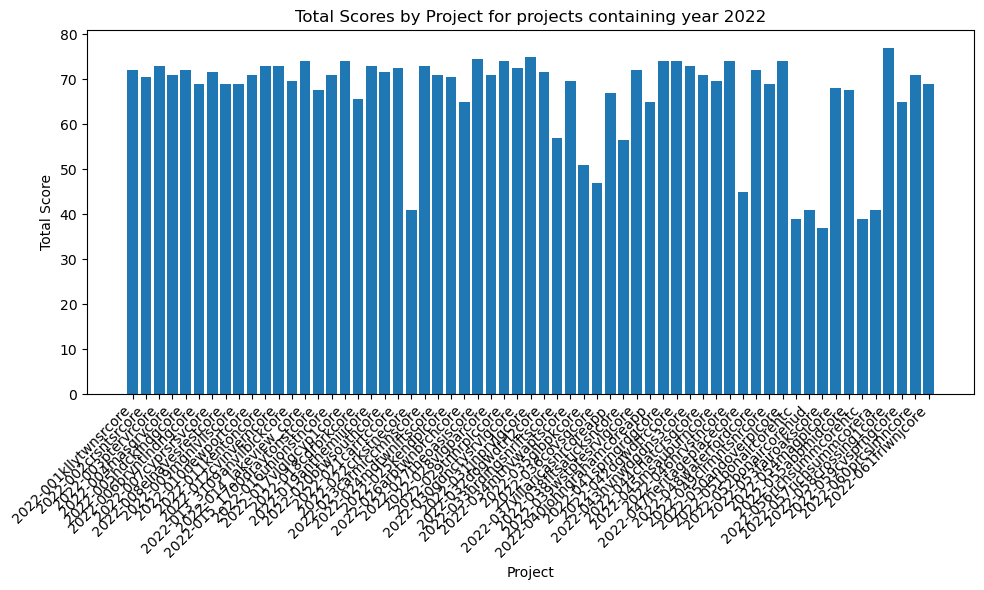

In [ ]:
import matplotlib.pyplot as plt

analysis_year = input("Enter a year for analysis (e.g., 2020): ").strip()

# Filter results based on whether the project name contains the entered year
year_df = results_df[results_df["Project"].astype(str).str.contains(analysis_year)]

if year_df.empty:
    print(f"No project found containing the year {analysis_year}.")
else:

    project_scores = year_df.groupby("Project")["Number"].sum().reset_index()
    
    # --- Step 3: Plotting the results ---
    plt.figure(figsize=(10, 6))
    plt.bar(project_scores["Project"], project_scores["Number"])
    plt.xlabel("Project")
    plt.ylabel("Total Score")
    plt.title(f"Total Scores by Project for projects containing year {analysis_year}")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

Extracted Data:
                              Project           Description  Number  Year
0     2006-017_bridge_creek_apartment  TOTAL POSSIBLE SCORE   153.0  2006
1     2006-012_marcus_street_senior_r  TOTAL POSSIBLE SCORE   146.0  2006
2            2006-051_barkley_estates  TOTAL POSSIBLE SCORE   148.0  2006
3      2006-046_parkway_court_village  TOTAL POSSIBLE SCORE   146.0  2006
4     2006-038_summer_trace_townhomes  TOTAL POSSIBLE SCORE   154.0  2006
...                               ...                   ...     ...   ...
1268               2023-029grove2core  TOTAL POSSIBLE SCORE     0.0  2023
1269              2023-031fpaugiiiapp  TOTAL POSSIBLE SCORE     0.0  2023
1270          2023-004finleyplacecore  TOTAL POSSIBLE SCORE     0.0  2023
1271            2023-030owenslndgcore  TOTAL POSSIBLE SCORE     0.0  2023
1272          2023-068blountcmmnscore  TOTAL POSSIBLE SCORE    61.0  2023

[1273 rows x 4 columns]

Summary Statistics by Year (2005 - 2023):
    Year  Count  LowerBound 

<Figure size 1200x800 with 0 Axes>

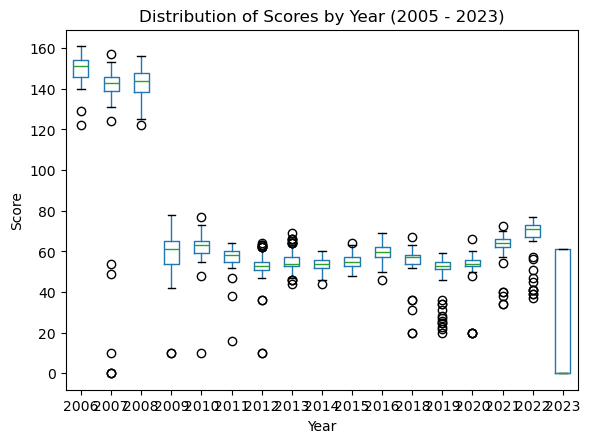

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt

search_text = input("Enter text to search in Description (case sensitive): ").strip()

results = []

# Loop through the years 2005 to 2023 (inclusive)
for year in range(2005, 2024):
    filename = f"extracted_{year}.xlsx"
    
    # Check if the file exists; if not, skip the year
    if not os.path.exists(filename):
        print(f"File {filename} not found. Skipping...")
        continue
    

    excel_file = pd.ExcelFile(filename)
    
    for sheet_name in excel_file.sheet_names:
        df = pd.read_excel(filename, sheet_name=sheet_name)
        
        # Use "Description" column if it exists; otherwise assume the first column holds descriptions
        if "Description" in df.columns:
            desc_series = df["Description"].astype(str)
        else:
            desc_series = df.iloc[:, 0].astype(str)
        
        # Filter rows containing the search text (case sensitive)
        mask = desc_series.str.contains(search_text, case=True, na=False)
        
        if mask.any():
           
            if "Number" in df.columns:
                num_series = df["Number"]
            else:
                num_series = df.iloc[:, 1]
            
          
            for desc, num in zip(desc_series[mask], num_series[mask]):
                results.append({
                    "Project": sheet_name,
                    "Description": desc,
                    "Number": num,
                    "Year": year
                })

# Convert the results list into a DataFrame
results_df = pd.DataFrame(results)
print("Extracted Data:")
print(results_df)




def q1(x):
    return x.quantile(0.25)

def q3(x):
    return x.quantile(0.75)

r"
year_stats = results_df.groupby("Year")["Number"].agg(
    Count="count",
    LowerBound="min",
    Q1=q1,
    Median="median",
    Q3=q3,
    UpperBound="max"
).reset_index()

print("\nSummary Statistics by Year (2005 - 2023):")
print(year_stats)



plt.figure(figsize=(12, 8))
results_df.boxplot(column="Number", by="Year", grid=False)
plt.title("Distribution of Scores by Year (2005 - 2023)")
plt.suptitle("")  # Remove the default subtitle
plt.xlabel("Year")
plt.ylabel("Score")
plt.show()


Extracted Data:
                              Project  \
0     2009-029legacywaltonvillage2gor   
1           2009-036quailrisegoracore   
2      2009-035brookhavenphiigoracore   
3         2009-022hamptonoaksgoracore   
4     2009-058parkplacecarrolltoniigo   
...                               ...   
1819               2023-029grove2core   
1820              2023-031fpaugiiiapp   
1821          2023-004finleyplacecore   
1822            2023-030owenslndgcore   
1823          2023-068blountcmmnscore   

                                            Description  Number  Year  
0     6. STABLE COMMUNITIES / REDEVELOPMENT / REVITA...     1.0  2009  
1     6. STABLE COMMUNITIES / REDEVELOPMENT / REVITA...     3.0  2009  
2     6. STABLE COMMUNITIES / REDEVELOPMENT / REVITA...     3.0  2009  
3     6. STABLE COMMUNITIES / REDEVELOPMENT / REVITA...     1.0  2009  
4     6. STABLE COMMUNITIES / REDEVELOPMENT / REVITA...     1.0  2009  
...                                                 ...    

<Figure size 1200x800 with 0 Axes>

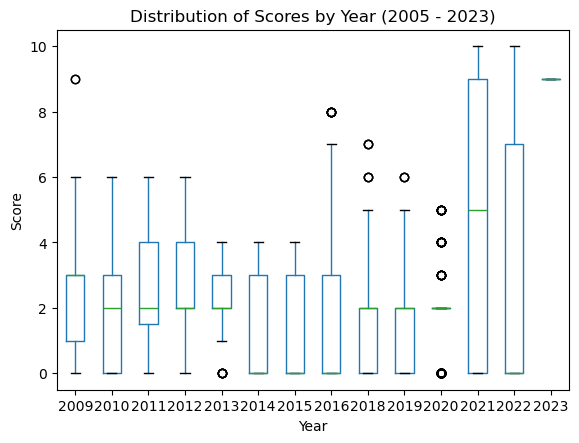

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt

search_text = input("Enter text to search in Description (case sensitive): ").strip()

results = []

# Loop through the years 2005 to 2023 (inclusive)
for year in range(2005, 2024):
    filename = f"extracted_{year}.xlsx"
    
    # Check if the file exists; if not, skip the year
    if not os.path.exists(filename):
        print(f"File {filename} not found. Skipping...")
        continue
    
    # Load the Excel file (each sheet represents a project)
    excel_file = pd.ExcelFile(filename)
    
    for sheet_name in excel_file.sheet_names:
        df = pd.read_excel(filename, sheet_name=sheet_name)
        
        # Use "Description" column if it exists; otherwise assume the first column holds descriptions
        if "Description" in df.columns:
            desc_series = df["Description"].astype(str)
        else:
            desc_series = df.iloc[:, 0].astype(str)
        
        # Filter rows containing the search text (case sensitive)
        mask = desc_series.str.contains(search_text, case=False, na=False)
        
        if mask.any():
            # Use "Number" column if it exists; otherwise, assume the second column contains the number
            if "Number" in df.columns:
                num_series = df["Number"]
            else:
                num_series = df.iloc[:, 1]
            
            # For each matching row, append the project name, description, number, and year to results
            for desc, num in zip(desc_series[mask], num_series[mask]):
                results.append({
                    "Project": sheet_name,
                    "Description": desc,
                    "Number": num,
                    "Year": year
                })

# Convert the results list into a DataFrame
results_df = pd.DataFrame(results)
print("Extracted Data:")
print(results_df)

def q1(x):
    return x.quantile(0.25)

def q3(x):
    return x.quantile(0.75)

# Group the data by year and compute summary statistics for "Number"
year_stats = results_df.groupby("Year")["Number"].agg(
    Count="count",
    LowerBound="min",
    Q1=q1,
    Median="median",
    Q3=q3,
    UpperBound="max"
).reset_index()

print("\nSummary Statistics by Year (2005 - 2023):")
print(year_stats)

# Create a box plot per year to show the distribution of "Number"
plt.figure(figsize=(12, 8))
results_df.boxplot(column="Number", by="Year", grid=False)
plt.title("Distribution of Scores by Year (2005 - 2023)")
plt.suptitle("")  # Remove the default subtitle
plt.xlabel("Year")
plt.ylabel("Score")
plt.show()


Extracted Data:
                            Project  \
0    2007-030_the_rivers_apartments   
1        2007-013_whitehall_commons   
2         2007-019_ridgefield_place   
3         2007-029_clover_set_place   
4             2007-018_pine_meadows   
..                              ...   
798           2023-030owenslndgcore   
799           2023-030owenslndgcore   
800         2023-068blountcmmnscore   
801         2023-068blountcmmnscore   
802         2023-068blountcmmnscore   

                                           Description  Number  Year  
0    c. “Community transportation roadway” (Rural) ...     0.0  2007  
1    c. “Community transportation roadway” (Rural) ...     2.0  2007  
2    c. “Community transportation roadway” (Rural) ...     2.0  2007  
3    c. “Community transportation roadway” (Rural) ...     2.0  2007  
4    c. “Community transportation roadway” (Rural) ...     2.0  2007  
..                                                 ...     ...   ...  
798  OR 2. Metro P

<Figure size 1200x800 with 0 Axes>

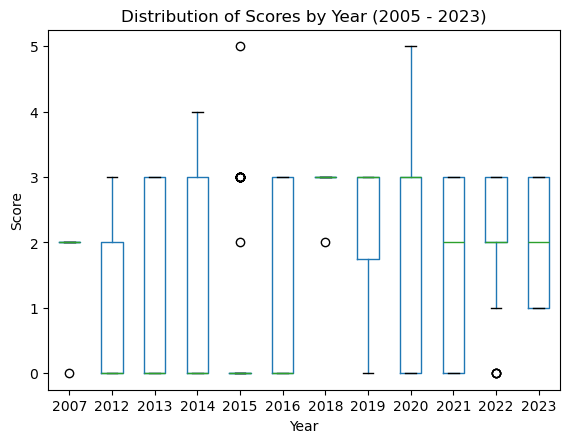

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt

search_text = input("Enter text to search in Description (case sensitive): ").strip()

results = []

# Loop through the years 2005 to 2023 (inclusive)
for year in range(2005, 2024):
    filename = f"extracted_{year}.xlsx"
    
    # Check if the file exists; if not, skip the year
    if not os.path.exists(filename):
        print(f"File {filename} not found. Skipping...")
        continue
    
    # Load the Excel file (each set represents a project)
    excel_file = pd.ExcelFile(filename)
    
    for sheet_name in excel_file.sheet_names:
        df = pd.read_excel(filename, sheet_name=sheet_name)
        
        # Use "Description" column if it exists; otherwise assume the first column holds descriptions
        if "Description" in df.columns:
            desc_series = df["Description"].astype(str)
        else:
            desc_series = df.iloc[:, 0].astype(str)
        
        # Filter rows containing the search text (case sensitive)
        mask = desc_series.str.contains(search_text, case=True, na=False)
        
        if mask.any():
            # Use "Number" column if it exists; otherwise, assume the second column contains the number
            if "Number" in df.columns:
                num_series = df["Number"]
            else:
                num_series = df.iloc[:, 1]
            
            # For each matching row, append the project name, description, number, and year to results
            for desc, num in zip(desc_series[mask], num_series[mask]):
                results.append({
                    "Project": sheet_name,
                    "Description": desc,
                    "Number": num,
                    "Year": year
                })

# Convert the results list into a DataFrame
results_df = pd.DataFrame(results)
print("Extracted Data:")
print(results_df)

def q1(x):
    return x.quantile(0.25)

def q3(x):
    return x.quantile(0.75)

# Group the data by year and compute summary statistics for "Number"
year_stats = results_df.groupby("Year")["Number"].agg(
    Count="count",
    LowerBound="min",
    Q1=q1,
    Median="median",
    Q3=q3,
    UpperBound="max"
).reset_index()

print("\nSummary Statistics by Year (2005 - 2023):")
print(year_stats)

plt.figure(figsize=(12, 8))
results_df.boxplot(column="Number", by="Year", grid=False)
plt.title("Distribution of Scores by Year (2005 - 2023)")
plt.suptitle("")  # Remove the default subtitle
plt.xlabel("Year")
plt.ylabel("Score")
plt.show()


In [ ]:
import pandas as pd


start_excel_row = 12  
end_excel_row   = 63  

for year in range(2021, 2022):  # 2021..2023 inclusive
    year = 2022
    input_file = f"LP-Project Plan/9pct_lihtc_{year}/all_in_one_sheets{year}.xlsx"
    output_file = f"cldtfor{year}.xlsx"

    try:
        excel_data = pd.ExcelFile(input_file)
    except FileNotFoundError:
        print(f"File not found: {input_file}")
        continue

    with pd.ExcelWriter(output_file) as writer:
        for sheet_name in excel_data.sheet_names:
            # Parse the sheet into a DataFrame
            df = excel_data.parse(sheet_name)

            
            df_subset = df.iloc[start_excel_row - 1 : end_excel_row]

            # Write the subset to the new file under the same sheet name
            df_subset.to_excel(writer, sheet_name=sheet_name, index=False)

    print(f"=== Completed extraction for year {year} → {output_file} ===")


=== Completed extraction for year 2022 → cldtfor2022.xlsx ===


In [ ]:
import pandas as pd



row_start_excel = 419
row_end_excel   = 450

col_start_excel = 26
col_end_excel   = 65

for year in range(2021, 2022):  # 2021..2023 inclusive
    year = 2023
    input_file = f"LP-Project Plan/9pct_lihtc_{year}/all_in_one_sheets{year}.xlsx"
    output_file = f"coldtfor_{year}.xlsx"

    try:
        excel_data = pd.ExcelFile(input_file)
    except FileNotFoundError:
        print(f"File not found: {input_file}")
        continue

    with pd.ExcelWriter(output_file) as writer:
        for sheet_name in excel_data.sheet_names:
            # Parse the sheet into a DataFrame
            df = excel_data.parse(sheet_name)

            df_subset = df.iloc[row_start_excel - 1 : row_end_excel,
                                col_start_excel - 1 : col_end_excel]

            # Write the subset to the new Excel file with the same sheet name
            df_subset.to_excel(writer, sheet_name=sheet_name, index=False)

    print(f"=== Finished extraction for year {year} → {output_file} ===")


=== Finished extraction for year 2023 → coldtfor_2023.xlsx ===
